In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc

# Create Spark session
spark = SparkSession.builder.appName("NetflixBigDataAnalysis").getOrCreate()


In [ ]:
# Load dataset
df = spark.read.csv("/content/netflix_titles_nov_2019.csv", header=True, inferSchema=True)

# Check schema
df.printSchema()

# Show first 5 rows
df.show(5)


root
 |-- show_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)
 |-- type: string (nullable = true)

+--------+--------------------+--------------------+--------------------+--------------------+-----------------+------------+------+---------+--------------------+--------------------+-------+
| show_id|               title|            director|                cast|             country|       date_added|release_year|rating| duration|           listed_in|         description|   type|
+--------+--------------------+--------------------+--------------------+--------------------+-----------------+------------+------+-

In [ ]:
df.groupBy("type").count().show()
df.groupBy("country").count().orderBy(desc("count")).show(10)
df.groupBy("listed_in").count().orderBy(desc("count")).show(10)
df.groupBy("release_year").count().orderBy("release_year").show(20)


+--------------------+-----+
|                type|count|
+--------------------+-----+
| raking in the lo...|    1|
| Robb Wells and M...|    1|
|"" four short fil...|    1|
| and tensions run...|    1|
| political hypocr...|    1|
|"" his exposé on ...|    1|
| his family and h...|    1|
| Frankie Stein an...|    1|
| music and acting...|    1|
| 10-story collect...|    1|
| middling salesma...|    1|
| viewers are trea...|    1|
|    North Carolina."|    1|
|"" a secretly gay...|    1|
| where their pare...|    1|
| Prius-driving co...|    1|
|                2017|    1|
|"" this exciting ...|    1|
|"" Ali Wong is ba...|    1|
|"" does not accep...|    1|
+--------------------+-----+
only showing top 20 rows

+--------------+-----+
|       country|count|
+--------------+-----+
| United States| 1900|
|         India|  697|
|          NULL|  429|
|United Kingdom|  336|
|         Japan|  168|
|        Canada|  139|
|   South Korea|  133|
|         Spain|  113|
|        France|   85|
| 

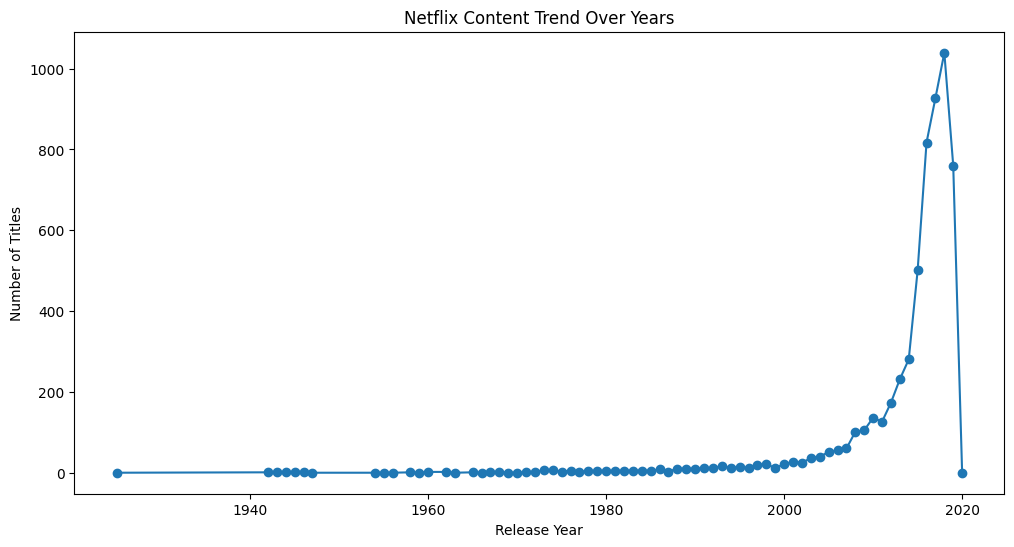

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert release_year to integer and filter valid values
trend_df = (
    df.filter(col("release_year").isNotNull())       # remove nulls
      .filter(col("release_year").cast("int").isNotNull())  # keep only numbers
      .groupBy("release_year")
      .count()
      .orderBy("release_year")
      .toPandas()
)

# Ensure correct type
trend_df["release_year"] = pd.to_numeric(trend_df["release_year"], errors="coerce")
trend_df = trend_df.dropna().astype({"release_year": "int"})

# Plot
plt.figure(figsize=(12,6))
plt.plot(trend_df["release_year"], trend_df["count"], marker="o")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content Trend Over Years")
plt.show()


In [ ]:
df.groupBy("country").count().orderBy(desc("count")).toPandas().to_csv("netflix_country_counts.csv", index=False)
